In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('penguins')
df = data.copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
N_c = df.drop(["species","island","flipper_length_mm","sex"],axis = 1)
N_c.head()

,bill_length_mm,bill_depth_mm,body_mass_g
0,39.1,18.7,3750.0
1,39.5,17.4,3800.0
2,40.3,18.0,3250.0
4,36.7,19.3,3450.0
5,39.3,20.6,3650.0


In [8]:
dummies_ = pd.get_dummies(df[["species","island","sex"]])
dummies_.head()

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,1,1,0
2,1,0,0,0,0,1,1,0
4,1,0,0,0,0,1,1,0
5,1,0,0,0,0,1,0,1


In [9]:
#dependent value
y = df["flipper_length_mm"]

**In order not to fall into the dummy variable trap, variable should be added in such a way that they cannot be explained with each other.**

In [10]:
#independent value
X = pd.concat([N_c,dummies_[["species_Adelie","species_Chinstrap","island_Biscoe","island_Dream","sex_Female"]]], axis = 1)
X.head(3)

,bill_length_mm,bill_depth_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Biscoe,island_Dream,sex_Female
0,39.1,18.7,3750.0,1,0,0,0,0
1,39.5,17.4,3800.0,1,0,0,0,1
2,40.3,18.0,3250.0,1,0,0,0,1


In [11]:
#The process of dividing the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.20,
                                                   random_state=42)

**SVR**

In [12]:
svr_ = SVR(kernel="linear")

In [13]:
svr_.fit(X_train,y_train)

SVR(kernel='linear')

**Compare**

In [14]:
flip_pred = svr_.predict(X_test)

In [15]:
print("RMSE", np.sqrt(mean_squared_error(y_test,flip_pred)))

RMSE 5.9954485267635205


In [29]:
flip_pred_2 = svr_.predict(X_train)

In [30]:
print("RMSE",np.sqrt(mean_squared_error(y_train,flip_pred_2)))

RMSE 5.593247519375863


In [35]:
a = pd.DataFrame({"Real Trainset Value" : y_train,
                "Predict Trainset Value": flip_pred_2})
a.head(5)

,Real Trainset Value,Predict Trainset Value
230,214.0,208.023692
84,191.0,186.338746
303,224.0,219.494886
22,189.0,186.457815
29,180.0,192.541496


In [37]:
b = pd.DataFrame({"Real Testset Value" : y_test,
                 "Predict Trainset Value" : flip_pred})
b.head(5)

,Real Testset Value,Predict Trainset Value
30,178.0,188.397503
317,222.0,213.442864
79,195.0,196.620724
201,198.0,198.768538
63,192.0,194.823648


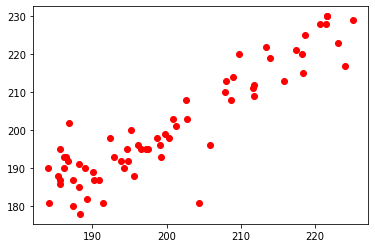

In [28]:
plt.scatter(flip_pred, y_test, color = 'red');

**The drawing above is the comparison of the predictions made on the test dataset with the actual values. The more normal the distribution, the more accurate the estimates.**

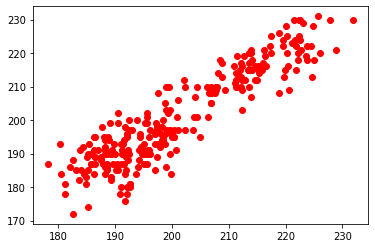

In [31]:
plt.scatter(flip_pred_2, y_train, color = 'red');

**The drawing above is the comparison of the predictions made on the train dataset with the actual values. The more normal the distribution, the more accurate the estimates.**